# Exploratory Data Analysis on Haberman Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

hm = pd.read_csv('haberman.csv')
hm.shape

(306, 4)

In [2]:
hm.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
hm.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [4]:
hm.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

**Observations**

1. The 'hm' dataframe, that was created from 'Haberman' dataset consists of 306 rows and 4 columns.
2. The Haberman dataset has above features which give us data about cancer patients like their age while they underwent the surgery, year in which the surgery performed, number of lymph nodes and patients survival period.
3. Under survival status feature, there are two classes, wherein '1' indicates that the patient had survived for more    than 5 years and '2' indicates that the patient had survived for less than 5 years after surgery.
4. Lymph nodes are small clumps of immune cells that act as filters for the lymphatic system. The lymphatic system runs throughout the body, like the circulatory (blood) system, and carries fluid and cells.If breast cancer spreads, the lymph nodes in the underarm (the axillary lymph nodes) are the first place it’s likely to go. 

    Lymph node status is highly related to prognosis (chances for survival).

    Lymph node-negative means none of the axillary lymph nodes contain cancer.
    Lymph node-positive means at least one axillary lymph node contains cancer.

    Prognosis is better when cancer has not spread to the lymph nodes. 

    The more lymph nodes that contain cancer, the poorer prognosis tends to be.
    
    Source : https://www.komen.org/breast-cancer/diagnosis/factors-that-affect-prognosis/lymph-node-status/

In [5]:
hm['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observations**
1. Out of 306 patients, 225 patients had survived for more than 5 years and 81 patients had survived for less than 5 years.
2. The above data shows that the 'Haberman' dataset is imbalanced as the number of datapoints for both the classes are different.
3. The number of patients survived for more than 5 years are slightly more than 2.75 times that of patients survived for less than 5 years.
4. Probability of a patient survived for more than 5 years is 0.74, whereas the probability of patient survived for less than 5 years is 0.26.

In [6]:
hm.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations**
1. The age of patients those who underwent surgery ranges from 30 years to 83 years with median age of 52 years.
2. The surgeries are performed in 1958 to 1969 period.
3. The number of lymph nodes of patients covered ranges from 0 to 52.

# Data Cleaning

In [7]:
hm.rename(columns = {'status':'survived_for'},inplace = True)
hm.loc[hm.survived_for == 1, 'survived_for'] = '>= 5 years'
hm.loc[hm.survived_for == 2, 'survived_for'] = '< 5 years'
hm['year'] = hm['year'] + 1900
hm.tail()

,age,year,nodes,survived_for
301,75,1962,1,>= 5 years
302,76,1967,0,>= 5 years
303,77,1965,3,>= 5 years
304,78,1965,1,< 5 years
305,83,1958,2,< 5 years


**Observations**
1. To improve readability and easy to comprehend, I changed column name 'status' to 'survived_for' and its contents '1'    to '>= 5 years' and '2' to '< 5 years'. 
2. The values in year column (58 to 69) are somewhat resembling values in age column. Therefore I add constant '1900'      to datapoints in 'year' column to improve readability.

In [8]:
hm['survived_for'].value_counts()

>= 5 years    225
< 5 years      81
Name: survived_for, dtype: int64

**Observation**

1. The count of two classes got tallied  after changing the terminology of classes.

# Objective

Our objective is to find whether there is relation between given features 'age', 'year', 'nodes' and survival period of patients. If there is relation, we have to find out which feature/features best predicts the survival period.  

# 2-D Scatter Plot

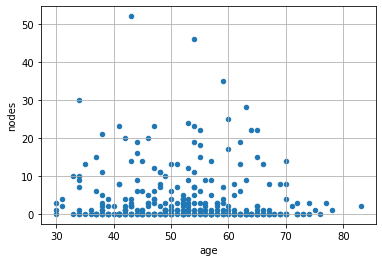

In [9]:
hm.plot(kind = 'scatter', x = 'age', y = 'nodes')
plt.grid()
plt.show()

**Observations**
1. Some data points got overlapped and difficult to differentiate in the above scatter plot. So it is difficult to draw any insights from it.

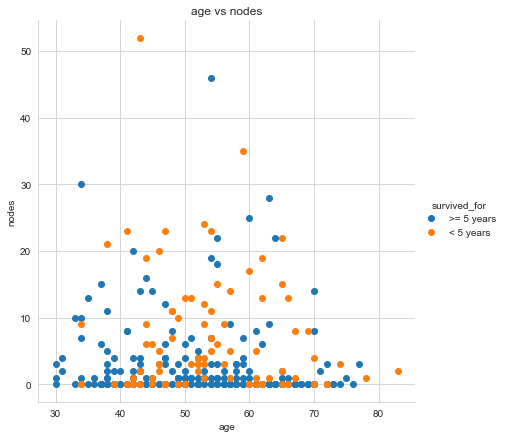

In [10]:
sb.set_style("whitegrid");
sb.FacetGrid(hm, hue="survived_for", height=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('age vs nodes')
plt.show();

**Observations**
1. As seaborn library comes with rich collection of functions that will help to make our graphs visually appealing, I used FacetGrid() function to display plot that differentiates each class with different colour coding.
2. Still the datapoints are not seperable and they have considerable overlap.

# Pair Plots

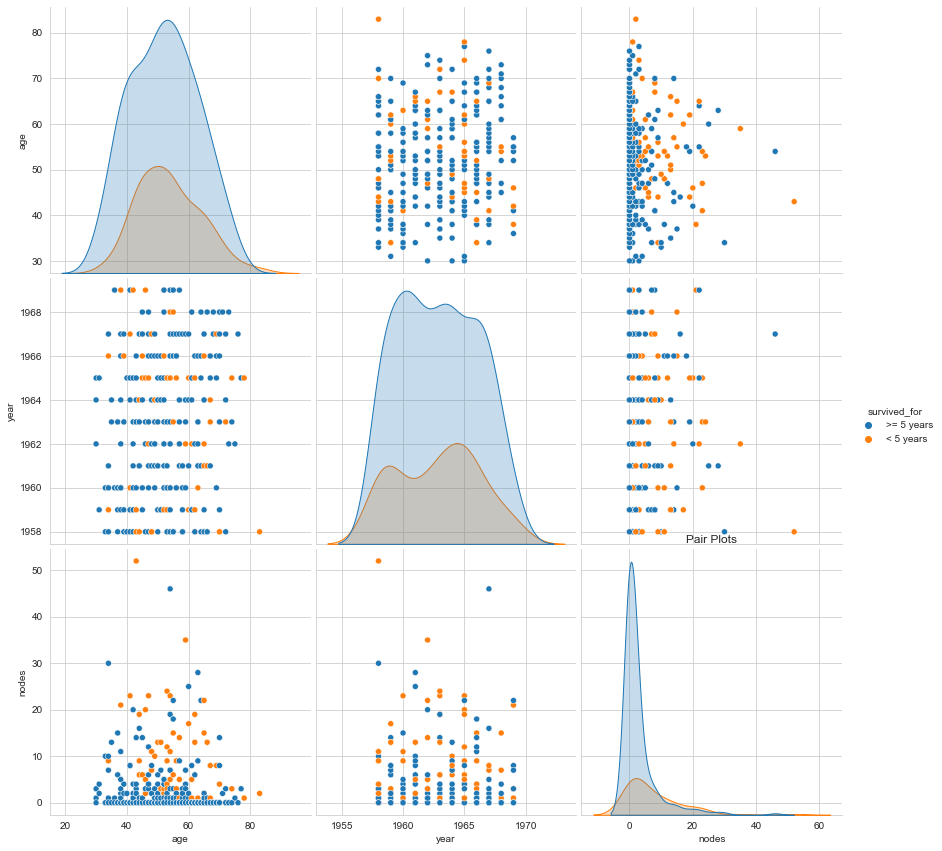

In [11]:
plt.close();
sb.set_style('whitegrid');
sb.pairplot(hm,hue="survived_for", height=4);
plt.title('Pair Plots')
plt.show()

**Observations**
1. In the above plots, digonal plots are Probability Density Functions(PDFs) of the given features 'age','year' and      'nodes'.
2. From all other plots, the plots which show relation of 'age' vs 'nodes' are somewhat better to classify survival     class.
3. The patients with less than 4 nodes and age less than 50 years have relatively higher survival rate compared to others.
4. There is overlap of two classes throughout all years when surgeries took place and one cannot predict the survival rate based on it.

# 1-D Scatter Plots

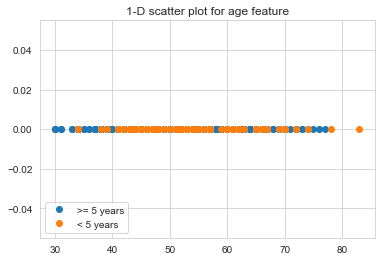

In [12]:
hm_more = hm.loc[hm['survived_for'] == '>= 5 years'];
hm_less = hm.loc[hm['survived_for'] == '< 5 years'];
plt.plot(hm_more['age'], np.zeros_like(hm_more['age']),'o')
plt.plot(hm_less['age'], np.zeros_like(hm_less['age']),'o')
plt.legend(['>= 5 years','< 5 years'],loc = 'lower left')
plt.title('1-D scatter plot for age feature')
plt.show()

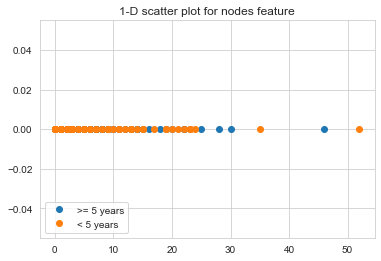

In [13]:
plt.plot(hm_more['nodes'], np.zeros_like(hm_more['nodes']),'o')
plt.plot(hm_less['nodes'], np.zeros_like(hm_less['nodes']),'o')
plt.legend(['>= 5 years','< 5 years'],loc = 'lower left')
plt.title('1-D scatter plot for nodes feature')
plt.show()

**Observations**
1. It is very difficult to infer any insights from 1-D scatter plot due to large overlap of data points of different classes.
2. As we can see from 1-D scatter plot of nodes, we are unable to visualize blue points that corresponds to survival rate of more than 5 years which are more in patients with less number of nodes. 

# Probability Density Function(PDF)

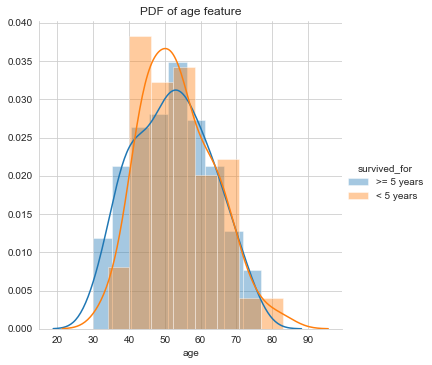

In [14]:
sb.FacetGrid(hm, hue='survived_for', height=5) \
   .map(sb.distplot, 'age') \
   .add_legend();
plt.title('PDF of age feature')
plt.show();

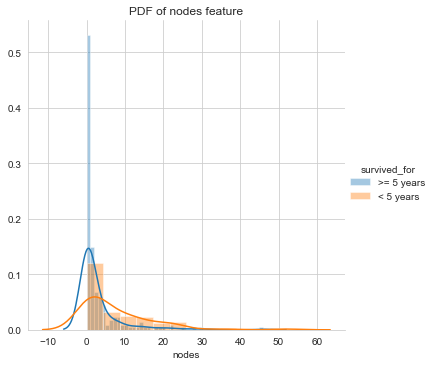

In [15]:
sb.FacetGrid(hm, hue='survived_for', height=5) \
   .map(sb.distplot, 'nodes') \
   .add_legend();
plt.title('PDF of nodes feature')
plt.show();

**Observations**
1. From the above two graphs, the probability density function graph of 'age' variable shows huge overlap of probabilities of two classes  for ages above 40.
2. The probability density function graph of 'nodes' variable shows that the survival rate for patients with nodes less than 5 is having higher probability. 

# Cumulative Density Function

 Range     PDF    CDF
-----------------------
30 to 35 - 0.05 - 0.05
35 to 40 - 0.11 - 0.16
40 to 45 - 0.12 - 0.28
45 to 50 - 0.13 - 0.41
50 to 55 - 0.17 - 0.58
55 to 60 - 0.16 - 0.74
60 to 65 - 0.12 - 0.85
65 to 70 - 0.08 - 0.93
70 to 75 - 0.05 - 0.99
75 to 80 - 0.01 - 1.00
80 to 85 - 0.00 - 1.00


Text(0.5, 1.0, 'More survival period w.r.to age')

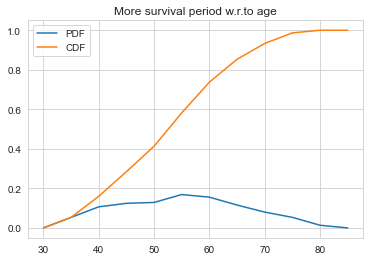

In [16]:
freq, buckets = np.histogram(hm_more['age'], bins = [25,30,35,40,45,50,55,60,65,70,75,80,85])
str_buck1 = ['30','35','40','45','50','55','60','65','70','75','80','85']
prob_dens = freq/sum(freq)
cumul_dens = np.cumsum(prob_dens)
print(" Range     PDF    CDF")
print("-----------------------")
for i in range(1,len(prob_dens)):
    print("{} to {} - {} - {}".format(str_buck1[i-1].zfill(2),str_buck1[i].zfill(2),"%0.2f"%prob_dens[i],"%0.2f"%cumul_dens[i]))
plt.plot(buckets[1:],prob_dens)
plt.plot(buckets[1:],cumul_dens)
plt.legend(['PDF','CDF'], loc = 'upper left')
plt.title('More survival period w.r.to age')

**Observations**

1. From above CDF of those who survived for more than 5 years, it is observed that 74% of them 
   are having age less than 60.

 Range     PDF    CDF
-----------------------
30 to 35 - 0.02 - 0.02
35 to 40 - 0.02 - 0.05
40 to 45 - 0.15 - 0.20
45 to 50 - 0.19 - 0.38
50 to 55 - 0.22 - 0.60
55 to 60 - 0.10 - 0.70
60 to 65 - 0.11 - 0.81
65 to 70 - 0.11 - 0.93
70 to 75 - 0.05 - 0.98
75 to 80 - 0.01 - 0.99
80 to 85 - 0.01 - 1.00


Text(0.5, 1.0, 'Less survival period w.r.to age')

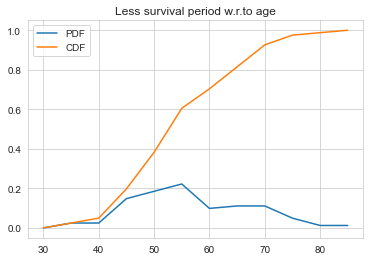

In [17]:
freq, buckets = np.histogram(hm_less['age'], bins = [25,30,35,40,45,50,55,60,65,70,75,80,85])
prob_dens = freq/sum(freq)
cumul_dens = np.cumsum(prob_dens)
print(" Range     PDF    CDF")
print("-----------------------")
for i in range(1,len(prob_dens)):
    print("{} to {} - {} - {}".format(str_buck1[i-1].zfill(2),str_buck1[i].zfill(2),"%0.2f"%prob_dens[i],"%0.2f"%cumul_dens[i]))
plt.plot(buckets[1:],prob_dens)
plt.plot(buckets[1:],cumul_dens)
plt.legend(['PDF','CDF'], loc = 'upper left')
plt.title('Less survival period w.r.to age')

**Observations**

1. 62% of the patients survived for less than 5 years are aged above 50.

 Range     PDF    CDF
-----------------------
00 to 05 - 0.84 - 0.84
05 to 10 - 0.08 - 0.92
10 to 15 - 0.04 - 0.95
15 to 20 - 0.02 - 0.97
20 to 25 - 0.01 - 0.98
25 to 30 - 0.01 - 0.99
30 to 35 - 0.00 - 1.00
35 to 40 - 0.00 - 1.00
40 to 45 - 0.00 - 1.00
45 to 50 - 0.00 - 1.00
50 to 55 - 0.00 - 1.00


Text(0.5, 1.0, 'More survival period w.r.to nodes')

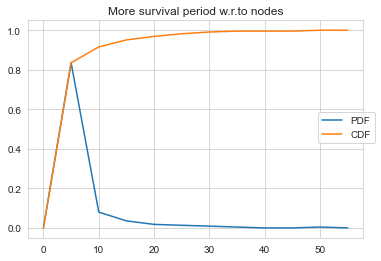

In [18]:
freq, buckets = np.histogram(hm_more['nodes'], bins = [-5,0,5,10,15,20,25,30,35,40,45,50,55])
str_buck2 = ['0','5','10','15','20','25','30','35','40','45','50','55']
prob_dens = freq/sum(freq)
cumul_dens = np.cumsum(prob_dens)
print(" Range     PDF    CDF")
print("-----------------------")
for i in range(1,len(prob_dens)):
    print("{} to {} - {} - {}".format(str_buck2[i-1].zfill(2),str_buck2[i].zfill(2),"%0.2f"%prob_dens[i],"%0.2f"%cumul_dens[i]))
plt.plot(buckets[1:],prob_dens)
plt.plot(buckets[1:],cumul_dens)
plt.legend(['PDF','CDF'], bbox_to_anchor = (1.05, 0.6))
plt.title('More survival period w.r.to nodes')

**Observations**

1. 84% of the patients who survived for more than 5 years are having lymph nodes less than 5.
2. 92% of the patients who survived for more than 5 years are having lymph nodes less than 10.
3. The above figure shows us that probability of greater survival periods is inversely proportional to number of lymph nodes.
4. The probability for greater survival is almost 0 if lymph nodes are more than 20.

 Range     PDF    CDF
-----------------------
00 to 05 - 0.52 - 0.52
05 to 10 - 0.19 - 0.70
10 to 15 - 0.12 - 0.83
15 to 20 - 0.06 - 0.89
20 to 25 - 0.09 - 0.98
25 to 30 - 0.00 - 0.98
30 to 35 - 0.00 - 0.98
35 to 40 - 0.01 - 0.99
40 to 45 - 0.00 - 0.99
45 to 50 - 0.00 - 0.99
50 to 55 - 0.01 - 1.00


Text(0.5, 1.0, 'Less survival period w.r.to nodes')

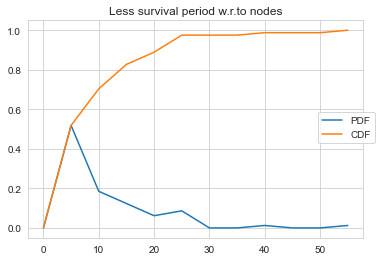

In [19]:
freq, buckets = np.histogram(hm_less['nodes'], bins = [-5,0,5,10,15,20,25,30,35,40,45,50,55])
prob_dens = freq/sum(freq)
cumul_dens = np.cumsum(prob_dens)
print(" Range     PDF    CDF")
print("-----------------------")
for i in range(1,len(prob_dens)):
    print("{} to {} - {} - {}".format(str_buck2[i-1].zfill(2),str_buck2[i].zfill(2),"%0.2f"%prob_dens[i],"%0.2f"%cumul_dens[i]))
plt.plot(buckets[1:],prob_dens)
plt.plot(buckets[1:],cumul_dens)
plt.legend(['PDF','CDF'], bbox_to_anchor = (1.05, 0.6))
plt.title('Less survival period w.r.to nodes')

**Observations**

1. 52% of the patients survived for less than 5 years are having lymph nodes less than 5.
2. 70% of the patients survived for less than 5 years are having lymph nodes less than 10.
3. As we have seen from 'age vs nodes' scatter plot, the patients of age above 40 with more than 3 lymph nodes have less survival rate. The patients with more age although having less nodes had less survival rate.
4. The final conclusion is that if the patient having age below 50 and lymph nodes less than 4 had higher survival rate ,otherwise less suvival rate.

# Mean and Std-dev

In [20]:
print("\nMeans of different features for both classes : ")
print("Mean age of patients survived for more than 5 years : ",np.around(np.mean(hm_more['age']),1))
print("Mean number of lymph nodes of patients survived for more than 5 years : ",np.around(np.mean(hm_more['nodes']),1))
print("Mean age of patients survived for less than 5 years : ",np.around(np.mean(hm_less['age']),1))
print("Mean number of lymph nodes of patients survived for less than 5 years : ",np.around(np.mean(hm_less['nodes']),1))

print("\nStandard Deviations of different features for both classes : ")
print("Standard Deviation of age of patients survived for more than 5 years : ",np.around(np.std(hm_more['age']),1))
print("Standard Deviation of number of lymph nodes of patients survived for more than 5 years : ",np.around(np.std(hm_more['nodes']),1))
print("Standard Deviation of age of patients survived for less than 5 years : ",np.around(np.std(hm_less['age']),1))
print("Standard Deviation of number of lymph nodes of patients survived for less than 5 years : ",np.around(np.std(hm_less['nodes']),1))


Means of different features for both classes : 
Mean age of patients survived for more than 5 years :  52.0
Mean number of lymph nodes of patients survived for more than 5 years :  2.8
Mean age of patients survived for less than 5 years :  53.7
Mean number of lymph nodes of patients survived for less than 5 years :  7.5

Standard Deviations of different features for both classes : 
Standard Deviation of age of patients survived for more than 5 years :  11.0
Standard Deviation of number of lymph nodes of patients survived for more than 5 years :  5.9
Standard Deviation of age of patients survived for less than 5 years :  10.1
Standard Deviation of number of lymph nodes of patients survived for less than 5 years :  9.1


**Observation**

1. The mean age of patients survived for more than 5 years is less than that of patients survived for less than 5 years.
2. The mean number of lymph nodes of patients survived for more than 5 years is little more than 1/3rd of that of patients survived for less than 5 years.
3. It is once again established that patients with age less than 50 and lymph nodes less than 4 have higher survival rate.

#  Median, Percentile, Quantile, IQR, MAD

In [21]:
print("\nMedians:")
print("Median age of patients survived for more than 5 years : ",np.median(hm_more['age']))
print("Median number of lymph nodes of patients survived for more than 5 years : ",np.median(hm_more['nodes']))
print("Median age of patients survived for less than 5 years : ",np.median(hm_less['age']))
print("Median number of lymph nodes of patients survived for less than 5 years : ",np.median(hm_less['nodes']))

print("\nQuantiles:")
print("The 0th, 25th, 50th and 75th percentiles of age of patients survived for more than 5 years : ",np.percentile(hm_more['age'],np.arange(0, 100, 25)).astype(int))
print("The 0th, 25th, 50th and 75th percentiles of nodes of patients survived for more than 5 years : ",np.percentile(hm_more['nodes'],np.arange(0, 100, 25)).astype(int))
print("The 0th, 25th, 50th and 75th percentiles of age of patients survived for less than 5 years : ",np.percentile(hm_less['age'],np.arange(0, 100, 25)).astype(int))
print("The 0th, 25th, 50th and 75th percentiles of nodes of patients survived for less than 5 years : ",np.percentile(hm_less['nodes'],np.arange(0, 100, 25)).astype(int))

print("\nInter Quartile Ranges:")
print("The IQR of age of patients survived for more than 5 years : ",np.percentile(hm_more['age'],75) - np.percentile(hm_more['age'],25))
print("The IQR of nodes of patients survived for more than 5 years : ",np.percentile(hm_more['nodes'],75) - np.percentile(hm_more['nodes'],25))
print("The IQR of age of patients survived for less than 5 years : ",np.percentile(hm_less['age'],75) - np.percentile(hm_less['age'],25))
print("The IQR of nodes of patients survived for less than 5 years : ",np.percentile(hm_less['nodes'],75) - np.percentile(hm_less['nodes'],25))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("The MAD of age of patients survived for more than 5 years : ",np.round(robust.mad(hm_more['age']),2))
print("The MAD of nodes of patients survived for more than 5 years : ",np.round(robust.mad(hm_more['nodes']),2))
print("The MAD of age of patients survived for less than 5 years : ",np.round(robust.mad(hm_less['age']),2))
print("The MAD of nodes of patients survived for less than 5 years : ",np.round(robust.mad(hm_less['nodes']),2))


Medians:
Median age of patients survived for more than 5 years :  52.0
Median number of lymph nodes of patients survived for more than 5 years :  0.0
Median age of patients survived for less than 5 years :  53.0
Median number of lymph nodes of patients survived for less than 5 years :  4.0

Quantiles:
The 0th, 25th, 50th and 75th percentiles of age of patients survived for more than 5 years :  [30 43 52 60]
The 0th, 25th, 50th and 75th percentiles of nodes of patients survived for more than 5 years :  [0 0 0 3]
The 0th, 25th, 50th and 75th percentiles of age of patients survived for less than 5 years :  [34 46 53 61]
The 0th, 25th, 50th and 75th percentiles of nodes of patients survived for less than 5 years :  [ 0  1  4 11]

Inter Quartile Ranges:
The IQR of age of patients survived for more than 5 years :  17.0
The IQR of nodes of patients survived for more than 5 years :  3.0
The IQR of age of patients survived for less than 5 years :  15.0
The IQR of nodes of patients survived for

**Observations**

1. The median number of lymph nodes of patients survived for more than 5 years is 0 which shows that patients with fewer lymph nodes have higher suvival rate.
2. The mean and median ages of both the classes are almost same.

# Box plot and Whiskers

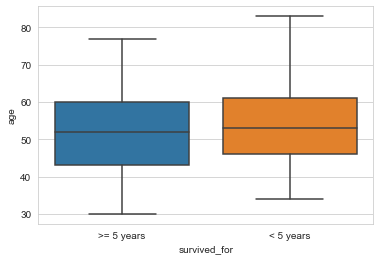

In [22]:
sb.boxplot(x = 'survived_for', y = 'age', data = hm)
plt.show()

**Observations**

1. The above box plot shows us visually that all indicators like minimum and maximum values, quantiles(25th,50th,75th) of age feature of patients survived for more than 5 years is less than that of patients survived for less than 5 years.

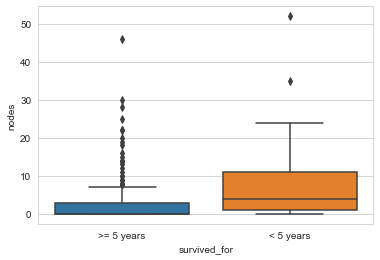

In [23]:
sb.boxplot(x = 'survived_for', y = 'nodes', data = hm)
plt.show()

**Observations**

1. The number of lymph nodes of patients survived for more than 5 years is fewer than that of patients survived for less than 5 years.
2. The 0th, 25th and even 50th percentile of lymph nodes are 0 for patients with more survoval period. Whereas the 25th, 50th, 75th and maximum value of lymph nodes for other class are higher comparatively.

# Violin plots

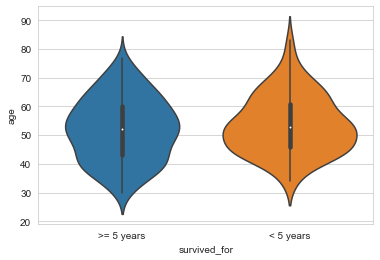

In [24]:
sb.violinplot(x = 'survived_for', y = 'age', data = hm)
plt.show()

**Observations**

1. The violin plot combinedly visualises both box plot and PDF.
2. Here we can infer the same observations as we observed earlier.

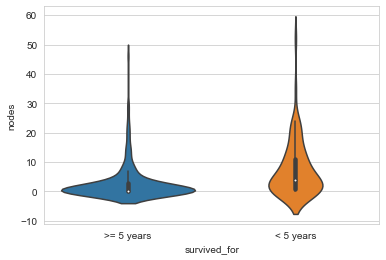

In [25]:
sb.violinplot(x = 'survived_for', y = 'nodes', data = hm)
plt.show()

**Observations**

1. The violin plot combinedly visualises both box plot and PDF.
2. Here we can infer the same observations as we observed earlier.